In [155]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [156]:
df1 = pd.read_csv('DISASTERS/1900_2021_DISASTERS.xlsx - emdat data.csv')
df2 = pd.read_csv('DISASTERS/1970-2021_DISASTERS.xlsx - emdat data.csv')
df = pd.concat([df1, df2], axis=0)

In [157]:
df = df[~df["Disaster Subgroup"].isin(["Biological", "Extra-Terrestrial"])]

In [158]:
df = df[['Year', 'Country', 'Disaster Type']]

In [159]:
top_countries = df["Country"].value_counts()[:3]

In [160]:
df = df.query('Country in @top_countries.index')

In [161]:
time_series = df.groupby(['Year', 'Disaster Type', 'Country']).size().reset_index(name='Count')

In [162]:
count = time_series.groupby(['Country', 'Disaster Type']).sum("Count")

In [163]:
count.sort_values(by=['Country','Count'], ascending=False)

Year  Count
Country                        Disaster Type                       
United States of America (the) Storm                  189141   1273
                               Flood                  111221    386
                               Wildfire                67916    178
                               Earthquake              65215     75
                               Extreme temperature     63657     66
                               Drought                 28027     33
                               Landslide               11939     11
                               Volcanic activity        3998      4
India                          Flood                  129143    586
                               Storm                  144605    379
                               Extreme temperature     79797    116
                               Landslide               63767    101
                               Earthquake              47695     49
                               Drought                 29724     27
                               Wildfire                 8017      8
                               Glacial lake outburst    2021      4
                               Mass movement (dry)      4001      4
China                          Storm                   97597    627
                               Flood                  117070    602
                               Earthquake             151776    357
                               Landslide               67999    147
                               Drought                 55813     75
                               Extreme temperature     22048     28
                               Wildfire                16014     16
                               Mass movement (dry)     11988     14

In [164]:
time_series = time_series.pivot_table(index=["Country", "Disaster Type"], columns="Year", values="Count").reset_index()

In [165]:
time_series = time_series.fillna(0)

In [166]:
disaster_types_by_country = {
    "United States of America (the)" : ["Storm", "Flood", "Wildfire"],
    "China" : ["Flood", "Storm", "Earthquake"],
    "India" : ["Flood", "Storm", "Extreme temperature "]
}

In [167]:
pairs = [ (country, disaster_type) for country in disaster_types_by_country.keys() for disaster_type in disaster_types_by_country[country] ]

In [168]:
pairs

[('United States of America (the)', 'Storm'),
 ('United States of America (the)', 'Flood'),
 ('United States of America (the)', 'Wildfire'),
 ('China', 'Flood'),
 ('China', 'Storm'),
 ('China', 'Earthquake'),
 ('India', 'Flood'),
 ('India', 'Storm'),
 ('India', 'Extreme temperature ')]

In [169]:
def filter_time_series_according_to_pairs(time_series, pairs):
    ''' This function filters the time series according to the pairs of country and disaster type'''
    return time_series[ time_series.apply(lambda row: (row["Country"], row["Disaster Type"]) in pairs, axis=1) ]

In [170]:
time_series

Year,Country,Disaster Type,1900,1902,1903,1905,1906,1907,1909,1910,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,China,Drought,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,4.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0
1,China,Earthquake,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,...,12.0,16.0,16.0,10.0,6.0,8.0,4.0,8.0,2.0,8.0
2,China,Extreme temperature,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,2.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
3,China,Flood,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,24.0,28.0,26.0,24.0,24.0,24.0,16.0,12.0,10.0,6.0
4,China,Landslide,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,6.0,4.0,2.0,6.0,8.0,0.0,4.0,2.0,0.0
5,China,Mass movement (dry),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,China,Storm,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,16.0,30.0,32.0,34.0,26.0,18.0,24.0,8.0,8.0,8.0
7,China,Wildfire,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0
8,India,Drought,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,0.0,0.0,2.0,0.0,0.0,0.0
9,India,Earthquake,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,2.0,0.0,6.0,2.0,0.0,0.0,0.0,0.0,2.0


In [171]:
time_series = filter_time_series_according_to_pairs(time_series, pairs)

In [172]:
#Get the index of the column the represents the year 2000
year_2000_index = time_series.columns.get_loc(1970)

# Take columns whoose index are 0 or 1 and those that are greater or equal to the year 2000 
time_series = time_series.iloc[:, [0, 1] + list(range(year_2000_index, time_series.shape[1]))]

In [173]:
time_series

Year,Country,Disaster Type,1970,1971,1972,1973,1974,1975,1976,1977,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
1,China,Earthquake,2.0,0.0,0.0,2.0,2.0,2.0,4.0,0.0,...,12.0,16.0,16.0,10.0,6.0,8.0,4.0,8.0,2.0,8.0
3,China,Flood,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,24.0,28.0,26.0,24.0,24.0,24.0,16.0,12.0,10.0,6.0
6,China,Storm,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,16.0,30.0,32.0,34.0,26.0,18.0,24.0,8.0,8.0,8.0
10,India,Extreme temperature,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,4.0,2.0,6.0,2.0,2.0,2.0,2.0,4.0,0.0,0.0
11,India,Flood,4.0,6.0,0.0,0.0,4.0,2.0,0.0,4.0,...,12.0,10.0,14.0,20.0,16.0,18.0,18.0,10.0,10.0,10.0
15,India,Storm,2.0,4.0,6.0,0.0,4.0,10.0,12.0,4.0,...,2.0,10.0,10.0,12.0,6.0,10.0,22.0,10.0,8.0,6.0
20,United States of America (the),Flood,0.0,0.0,2.0,4.0,0.0,0.0,2.0,6.0,...,2.0,14.0,4.0,10.0,12.0,6.0,6.0,8.0,4.0,18.0
22,United States of America (the),Storm,4.0,4.0,4.0,4.0,4.0,8.0,0.0,4.0,...,38.0,30.0,26.0,38.0,32.0,34.0,22.0,28.0,38.0,30.0
24,United States of America (the),Wildfire,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,10.0,2.0,8.0,8.0,6.0,6.0,4.0,2.0,8.0


In [174]:
def plot_time_series(time_series):
    '''Plot each row of the time series indepentdently as a time series line plot using seaborn sns'''
    for _, row in time_series.iterrows():
        sns.lineplot(x=time_series.columns[2:], y=row[2:], label=row["Country"] + " - " + row["Disaster Type"])
        plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
        plt.show()
        
    return None

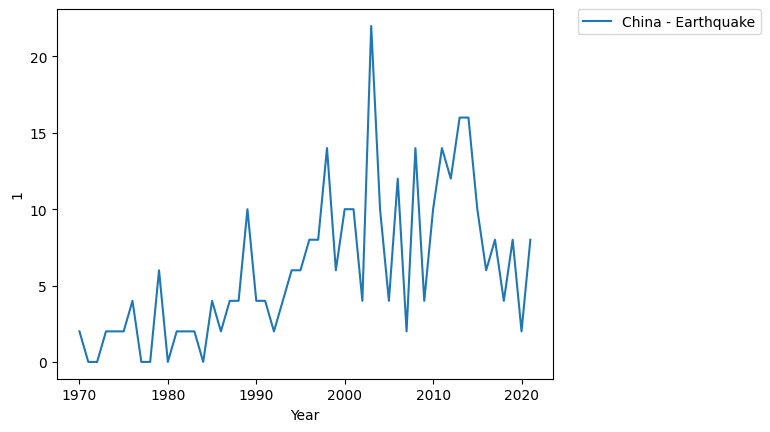

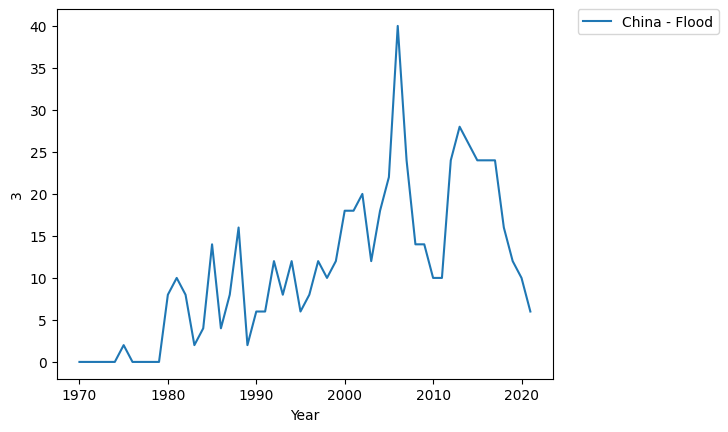

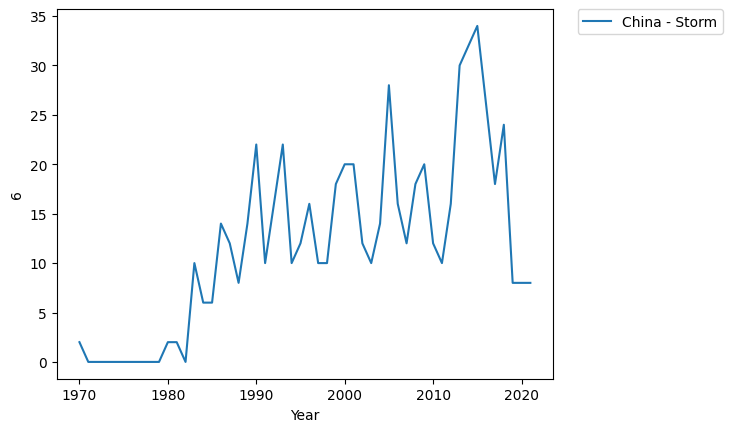

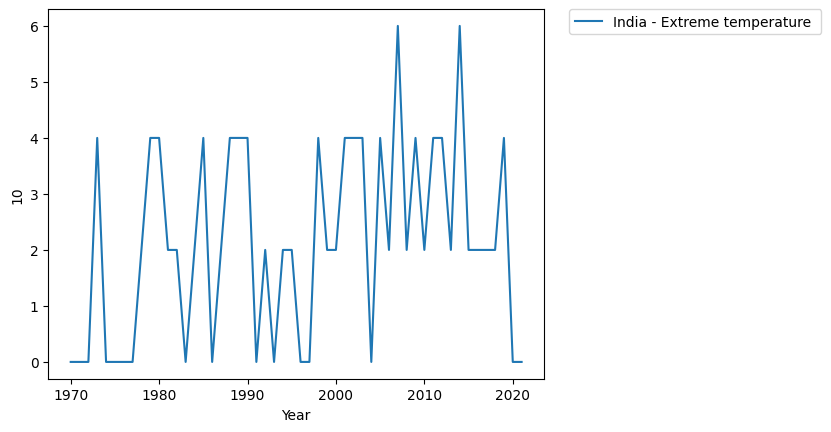

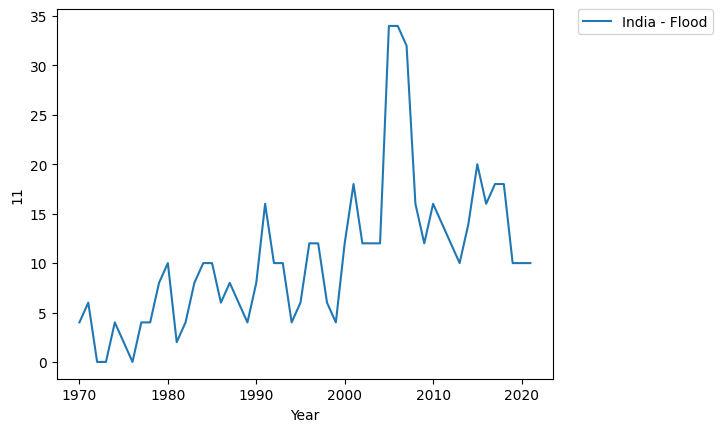

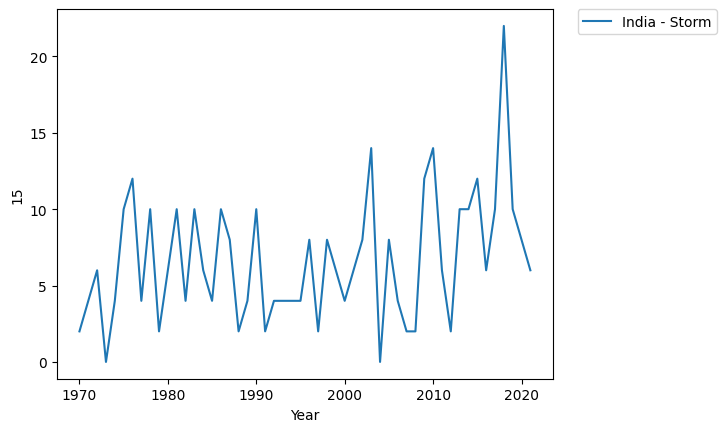

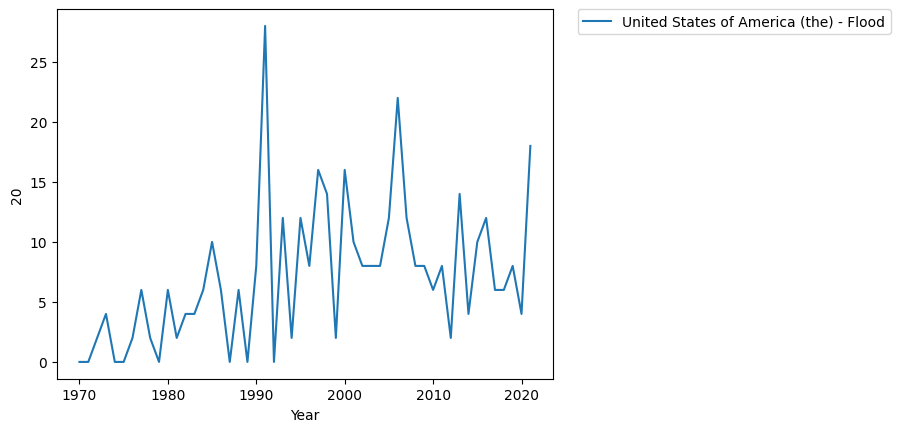

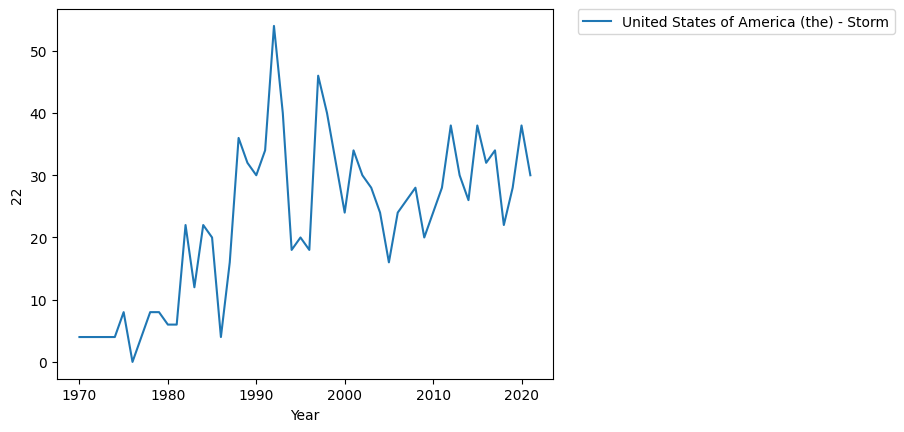

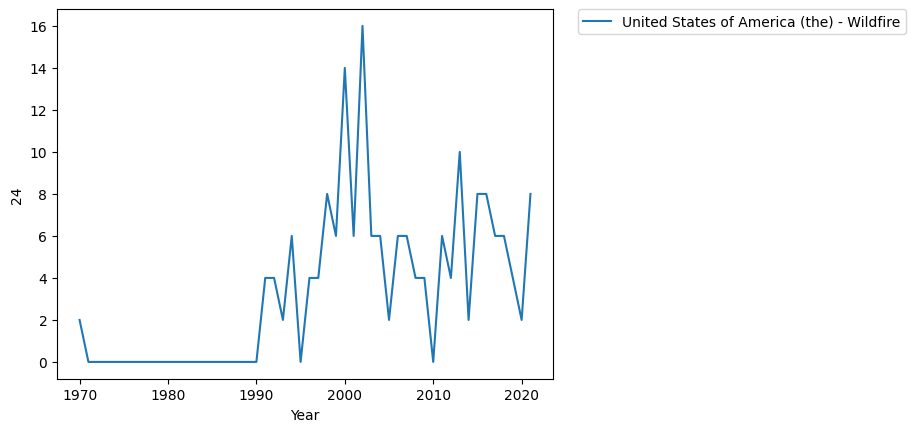

In [175]:
plot_time_series(time_series)